# MINI PROJET MDI 220

# Aurore GOSMANT

In [88]:
library(dplyr)
install.packages("rmarkdown")
data(discoveries)

Installing package into 'C:/Users/agos6/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'rmarkdown' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\agos6\AppData\Local\Temp\Rtmpe69kJw\downloaded_packages


# EXERCICE 1 : Analyse explorative

#### Question 1

###### a) La densité de la loi géométrique est donnée par : $x\in\mathbb{N}$, $p_{\theta}(x) = \theta(1-\theta)^{x}$  
Or, l'hypothèse de dépendance nous donne : 

$p(x,\theta) = p_{\theta}{(X_{1} = x_{1},...X_{n} = x_{n}) = \theta^{n}(1-\theta)^{{\sum_{i=1}^{n}} x_{i}}}$   

En considérant le logarithme de la fonction de vraisemblance, i.e. en considérant l'opérateur log-vraisemblance, on obtient :

$log(p(x,\theta)) = nlog(\theta) + log(1-\theta){{\sum_{i=1}^{n}} x_{i}}$ 

L'estimateur du maximum de vraisemblance s'obtient en résolvant l'équation de vraimsemblance :   

$\frac{\partial log(p(x,\theta))}{\partial \theta} = \frac{n}{\theta} - \frac{{{\sum_{i=1}^{n}} x_{i}}}{1 - \theta} = 0$  

On trouve donc que  : 

$\hat{\theta} = \frac{1}{1 + \frac{1}{n} \displaystyle {{\sum_{i=1}^{n}} x_{i}}}$

In [89]:
n<-length(discoveries) #longueur de l'échantillon
n


somme = 0
for (i in 1:n){
  somme = somme + discoveries[i]
}


[1] 100

In [90]:
#Application numérique 
estimTheta = 1/(1 + somme*1/n)
estimTheta


[1] 0.2439024

La valeur de cet estimateur $\hat\theta$ pour ce jeu de données est $\hat\theta$ = 0.2439024.

#### Question 2

On applique la même méthode pour trouver l'estimateur de maximum de vraismemblance d'un modèle de Poisson.

$p(x,\lambda) = p_{\lambda}{(X_{1} = x_{1},...X_{n} = x_{n}) = {{\prod_{i=1}^{n}} \frac{(\lambda)^{x_{i}}\exp^{-\lambda}}{x_{i}!}}} = \frac{(\lambda)^{{{\sum_{i=1}^{n}} x_{i}}}\exp^{-n\lambda}}{{{\prod_{i=1}^{n}} x_{i}!}}$

L'opérateur log-vraisemblance donne :

$log(p(x,\lambda)) = log(\lambda){{\sum_{i=1}^{n}} x_{i}} -n\lambda - {{\sum_{i=1}^{n}}log(x_{i}!)}$

Puisque la fonction est différentiable, on cherche à annuler la derivée partielle de la log-vraimsemblance : 

$\frac{\partial log(p(x,\lambda))}{\partial \lambda} = -n + \frac{{\sum_{i=1}^{n}} x_{i}}{\lambda} = 0$  


L'estimateur de maximum de vraisemblance $\hat\lambda$ est : 

$\hat\lambda = \frac{{\sum_{i=1}^{n}} x_{i}}{n}$





In [91]:
estimLambda = somme*1/n
estimLambda

[1] 3.1

La valeur de cet estimateur $\hat\lambda$ pour ce jeu de données est $\hat\lambda$ = 3.1.

#### Question 3

Si X suit une loi de géométrique, alors : 

$\mathbb{E}(X) = \frac{1}{\theta}$  
$\mathbb{V}(X) = \frac{1-\theta}{\theta^{2}}$

In [92]:
#' Calcul des moyennes et variances du jeu de données, puis comparaison aux espérances et variances théoriques des deux modèles considérés
meanDataSet = mean(discoveries)
varDataSet = var(discoveries)

espGeom = 1/estimTheta
varGeom = (1-estimTheta)/(estimTheta**2)

espGeom
varGeom

[1] 4.1

[1] 12.71

Si X suit une loi de poisson, alors : 

$\mathbb{E}(X) = \lambda$  
$\mathbb{V}(X) = \lambda$

In [93]:
espPoisson = estimLambda
varPoisson = estimLambda

espPoisson
varPoisson

[1] 3.1

[1] 3.1

In [94]:
df <- data.frame(moyennes = c(meanDataSet, espGeom, espPoisson), variances = c(varDataSet, varGeom, 
                                                       varPoisson))
row.names(df) <- c("Jeu de données", "Loi géométrique estimée", "Loi de poisson estimée")
df

,moyennes,variances
,<dbl>,<dbl>
Jeu de données,3.1,5.080808
Loi géométrique estimée,4.1,12.710000
Loi de poisson estimée,3.1,3.100000


D'après ce résultat, on constante que la moyenne et la variance empirique du jeu de données ne sont pas égales. Ainsi, sachant que la moyenne et la variance sont différentes, contrairement à un modèle de Poisson, on préfère supposer que le modèle le plus adapté au jeu de données est un modèle de loi géométrique.

#### Question 4

A la vue du graphique ci-dessous, notre première impression est donc confirmée, et on suppose bien que le modèle suit une loi géométrique.

[1] 12

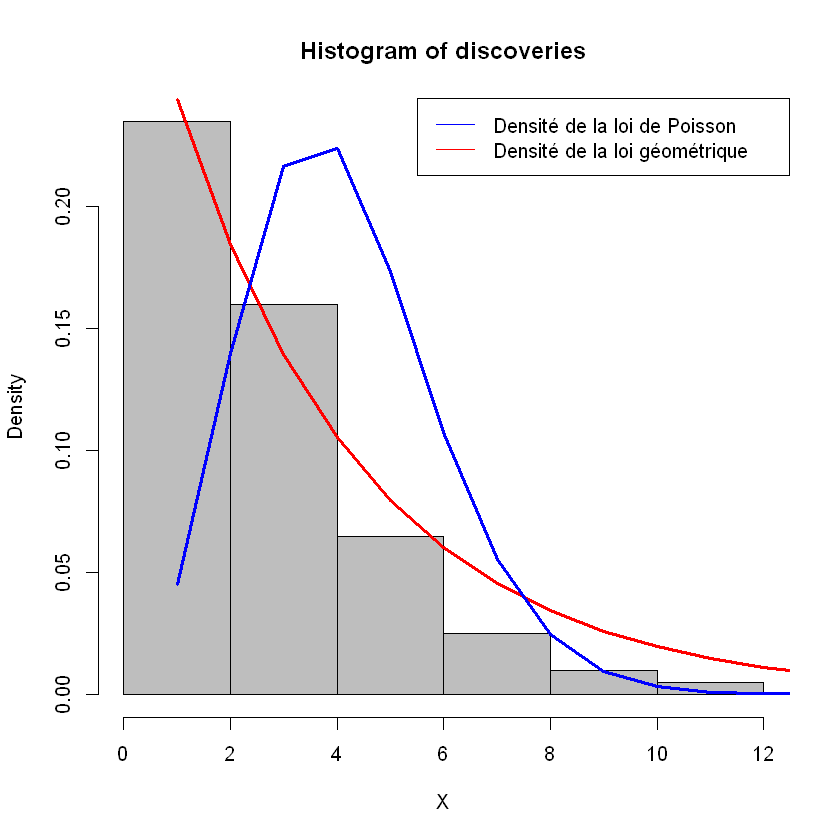

In [95]:
max = max(discoveries) #Valeur maximum du jeu de données
max
support<- 0:max

hist(discoveries, probability = TRUE, col="grey",xlab="X")
points(dgeom(support,estimTheta), type='l', col='red', lwd=3)
points(dpois(support,estimLambda),type='l',col="blue",lwd=3)
legend("topright",legend =c("Densité de la loi de Poisson","Densité de la loi géométrique"),  
       lty = 1, col=c("blue","red"))

#### Question 5 : QQ-plot d'un jeu de données

On ordonne d'abord le jeu de données par ordre croissant, puis on calcule les déciles. Les quantiles doivent se rapprocher au mieux de la diagonale si la loi de $X_{i}$ suit la loi utilisée pour tracer la fonction de répartition.

D'après ces graphiques, c'est la loi de Poisson qui permet un modèle mieux approché du jeu de données.

###### Pour la loi de Poisson : 

0%  10%  20%  30%  40%  50%  60%  70%  80%  90% 100% 
   0    1    1    2    2    3    3    4    5    6   12

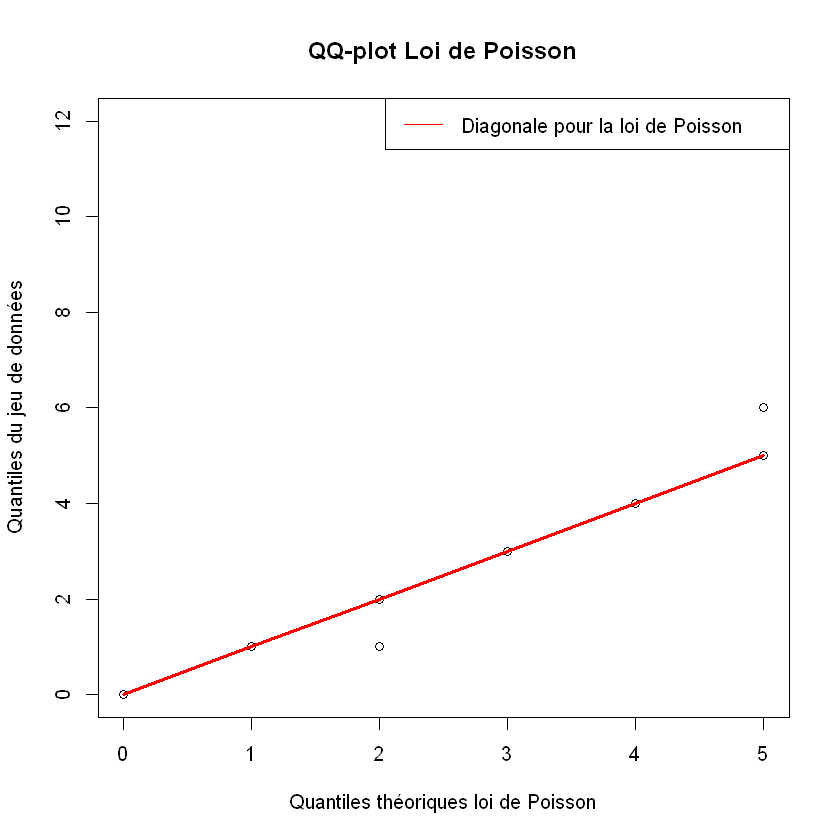

In [96]:
newdata <- sort(discoveries) #tri les valeurs du jeu de données par ordre croissant

n<- length(newdata)
quantile(newdata, probs=seq(0, 1, 0.1)) #calcule des déciles
pois<- qpois(p=seq(0,1,0.1), estimLambda, lower.tail = TRUE, log.p=FALSE)
#'
qqplot(pois,newdata, main="QQ-plot Loi de Poisson",xlab="Quantiles théoriques loi de Poisson",ylab = "Quantiles du jeu de données")
points(pois,pois,type="l",col="red",lwd=3)
legend("topright",legend =c("Diagonale pour la loi de Poisson"),  
       lty = 1, col=c("red"))


#'D'apres le graphique, c'est la loi de poisson qui permet de modéliser au mieux notre jeu de données
#'Q6) 


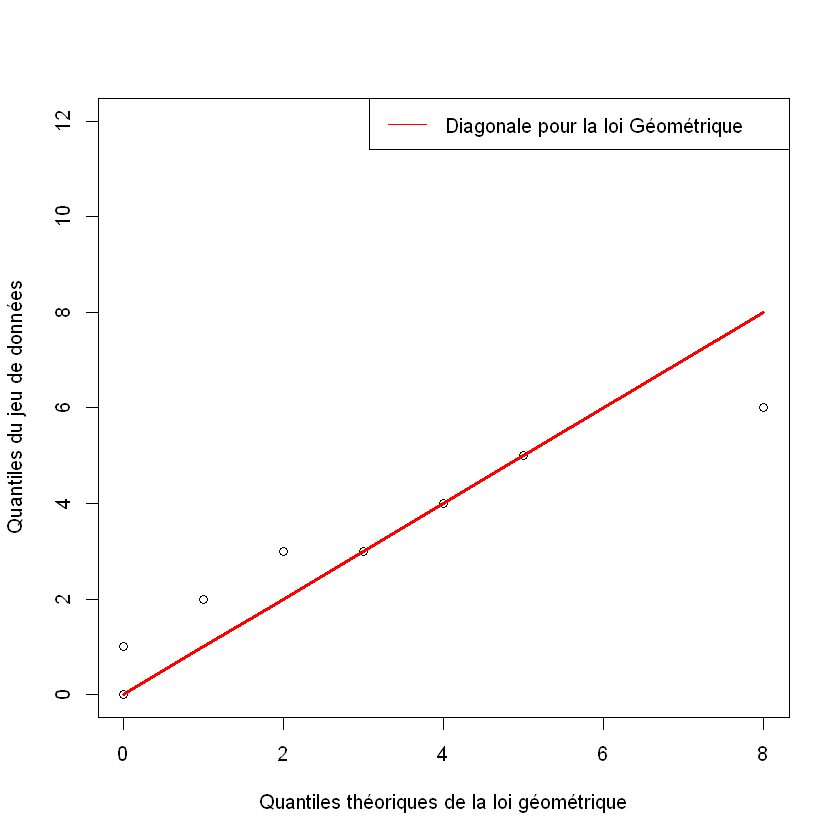

In [97]:
geom<-qgeom(p=seq(0,1,0.1), estimTheta, lower.tail = TRUE, log.p=FALSE)
qqplot(geom,newdata,xlab = "Quantiles théoriques de la loi géométrique",ylab ="Quantiles du jeu de données")
points(geom,geom,type="l",col="red",lwd=3)
legend("topright",legend =c("Diagonale pour la loi Géométrique"),  
       lty = 1, col=c("red"))



#### Question 6

On commence par calculer la validité du test d'ajustement du $\chi^{2}$ en vérifiant que tous pour tout j, $n_{j} \ge 5$. 

In [98]:
#La liste est composée des nj à l'indice j

nlist = c(0,0,0,0,0,0)
for (x in discoveries){
    if (x<5){
        nlist[x+1] = nlist[x+1] +1
    }
    else{
        nlist[6]= nlist[6] +1
    }
}
nlist

[1]  9 12 26 20 12 21

Le test du $\chi^{2}$ est donc valide, car l'hypothèse sur les $n_{j}$ suffisamment grands est vérifiée.

Sachant que les modèles paramétriques sont tous les deux de dimension $p =1$, car les paramètres $\lambda$ et $\theta$ sont réels, alors, on en conclut que le degré de liberté de la statistique $S$ est $k-1-p = 6 - 1 = 4$. 

Dans le cas de la loi de Poisson : 
    
On calcule les $p_{j} =  \mathbb{P}_{\lambda}(X_{i} \in I_{j})$, en parcourant la base de données.

In [99]:
plistpois = c(0,0,0,0,0,0)
estimLambda
sum = 0
for (k in 1:5){
    plistpois[k] = dpois(k-1, lambda = estimLambda)
    sum = sum+plistpois[k]
}
plistpois[6] = 1- sum
plistpois


plistgeom = c(0,0,0,0,0,0)
sum = 0
for (k in 1:5){
    plistgeom[k] = dgeom(k-1, estimTheta)
    sum = sum+plistgeom[k]
}
plistgeom[6] = 1-sum
plistgeom

[1] 3.1

[1] 0.0450492 0.1396525 0.2164614 0.2236768 0.1733495 0.2018105

[1] 0.24390244 0.18441404 0.13943501 0.10542647 0.07971269 0.24710935

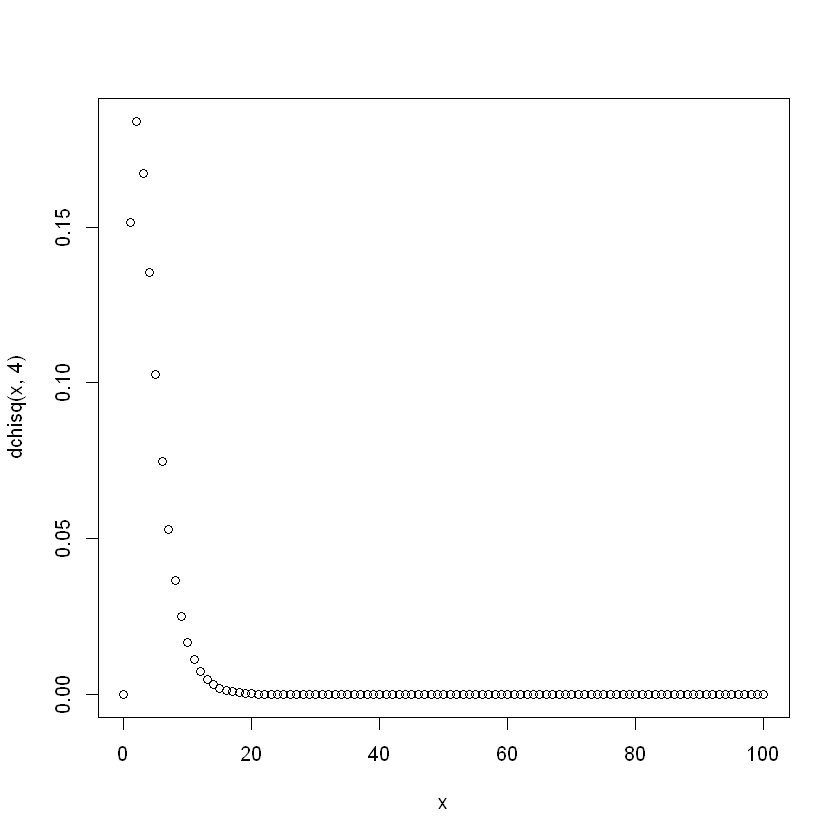

In [100]:
x=0:100
plot(x, dchisq(x, 4))

Pour une valeur de confiance de 5%, on rejette l'hypothèse nulle si la statistique $S$ dépasse le 
quantile d'ordre $1-\alpha$, d'où :


In [101]:
alpha = 0.05

S<- function(plist, nlist){
    sum = 0
    n=100
    for (j in 1:6){
        tmp = (nlist[j]-n*plist[j])**2
        tmp1 = n*plist[j]
        sum = sum + (tmp/tmp1)
    }
    sum
}

Spois = S(plistpois, nlist)
Sgeom = S(plistgeom, nlist)
Spois
Sgeom



[1] 7.563272

[1] 33.46325

Afin de calculer la p-valeur de la statistique de test dans chacun des deux modèles, on exprime $q_{1-\alpha}$ de la loi du $\chi^{2}$ en fonction de $\alpha$.

La p-valeur de la statistique est atteinte en $\alpha$ telle que  $q_{1-\alpha} = S$.

[1] 0.11

[1] 0.01

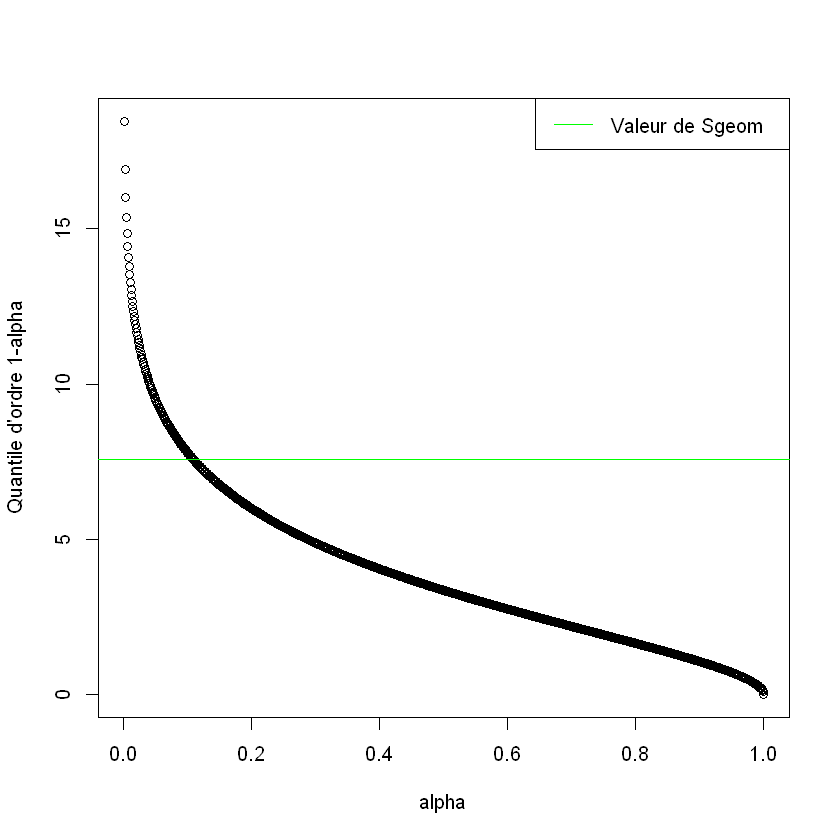

In [111]:
abs = seq(0,1,0.001)
plot(abs, qchisq(1-abs, 4),xlab="alpha",ylab="Quantile d'ordre 1-alpha")
legend("topright",legend =c("Valeur de Sgeom"),  
       lty = 1, col=c("green"))

#Calcul de la p-valeur pour la loi de Poisson
alphap = 0
while(qchisq(1- alphap, 4)>Spois){
    alphap= alphap+0.01
}
alphap

#Calcul de la p-valeur pour la loi géométrique
alphag = 0
while(qchisq(1-alphag, 4)>Sgeom){
    alphag= alphag+0.01
}
alphag

abline(h=Spois, col="green")
abline(h=Sgeom, col="blue")

Pour accepter un modèle avec niveau de confiance de 5%, il faut que la Statistique S soit inférieure au quantile d'ordre $1-\alpha$, de la loi du $\chi^{2}$.

In [112]:
alpha = 0.05
quantile = qchisq(1-alpha, 4)

if(Sgeom>quantile){
    "Loi géométrique refusée"
}
if (Spois<quantile){
    "Loi de poisson aceptée"
}

[1] "Loi géométrique refusée"

[1] "Loi de poisson aceptée"


# Exercice 2 : Analyse de l'incertitude dans le modèle de Poisson

On suppose désormais que les données suivent désormais une loi de Poisson de paramètre $\lambda$ inconnu. 


#### Question 1

Montrons que pour tout $ s \geq 1, $ la fonction $\lambda \mapsto P_{\lambda}({{\sum_{i=1}^{n}} X_{i}} \geq s)$ est croissante.

Sachant que $X_{i} $ suit une loi de Poisson de paramètre $\lambda$, alors ${{\sum_{i=1}^{n}} X_{i}}$ ~ $P(n\lambda)$ : 

Donc $P_{\lambda}({{\sum_{i=1}^{n}} X_{i}} \geq s) = {{\sum_{k=s}^{\infty}} P({{\sum_{i=1}^{n}} X_{i}} = k)} = {{\sum_{k=s}^{\infty}} \frac{(n\lambda)^{k}\exp^{-n\lambda}}{k!}}$

En dérivant par rapport à $\lambda$ : 

$\frac{\partial P_{\lambda}({{\sum_{i=1}^{n}} X_{i}} \geq s)}{\partial \lambda}  = \exp^{-n\lambda}{\sum_{k=s}^{\infty}}(     \frac{n^{k}\lambda^{k-1}}{(k-1)!} - \frac{n^{k+1}\lambda^{k}}{k!}) = \exp^{-n\lambda} \frac{n^{s}\lambda^{s-1}}{s-1!} \geq 0$

La fonction est donc croissante de $\lambda$.

#### Question 2

Montrons d'abord que la condition (MON) est vérifiée.

Soit $\lambda' \geq \lambda.  Posons Z_{\lambda,\lambda'}(X) = \frac{p_{\lambda'}(x)}{p_{\lambda}(x)} $.

On a $Z_{\lambda,\lambda'}(X) = (\frac{\lambda'}{\lambda})^{{{\sum_{i=1}^{n}} x_{i}}}\exp^{-n(\lambda' - \lambda)} = (\frac{\lambda'}{\lambda})^{T(X)}\exp^{-n(\lambda' - \lambda)}$

Or, puisque $\lambda' \geq \lambda,$ alors $   t \mapsto (\frac{\lambda'}{\lambda})^{t}\exp^{-n(\lambda' - \lambda)}$ est strictement croissant.

Donc on peut poser $\delta(T) =  \mathbb{1}_{\{T \geq s\}} $

où s est défini tel que  $\mathbb{P}_{\lambda = 3}(T(X) \geq s) = \alpha$, avec $\alpha$ = 0.05.

Par ailleurs, puisque T(X) ~ $P(n\lambda)$, où $\lambda$ = 3, alors on en déduit que s = $q_{1 -\alpha}$, q étant le quantile associé à la loi P(3n).




In [113]:
s = qpois(p=0.95, 3*n, lower.tail = TRUE, log.p=FALSE)
print(s)

[1] 329


#### Question 3

On a réussi à trouver un s tel que $\mathbb{P}_{\lambda = 3}(T(X) \geq s) = 0.05$, donc tel que dans 95% des cas, $H_{0}$ est vraie.
Donc, on accepte l'hypothèse nulle $H_{0}$.

#### Question 4

Pour rejeter l'hypothèse nulle $H_{0}$, il faut que $T(X) = {{\sum_{i=1}^{n}} x_{i}} $ soit en moyenne supérieur à s, donc que 

$n_{0}m \geq s$, où $m=\frac{1}{n_{0}}{{\sum_{i=1}^{n}} x_{i}}$

On a donc que le nombre minimum $n_{0} $ de données nécessaires pour pouvoir rejeter l'hypothèse nulle à l'aide d'un test de niveau inférieur ou égal à 5% comme celui construit précedemment, est $n_{0} = 810$:

In [114]:
#Calcul de n0

s <- function(n){
    tmp = qpois(p=0.95, 3*n, lower.tail = TRUE, log.p=FALSE)
    tmp
}
 
m<-function(n) {
    somme = 0
    for (i in 1:n){
        somme = somme + discoveries[i]
    }
    somme/n
    
}
n0 = 1
m = m(100)

while(n0*m<s(n0)){
    n0=n0+1
    
}
n0


[1] 810

#### Question 5

La fonction puissance du test précédent s'écrit : $\beta(\lambda) = 1 - \mathbb{P}_{\lambda}(T(X) \leq s) = 1 - F(s)$, où F est la fonction de répartition correspondant à une loi de poisson de paramètre $n\lambda$.

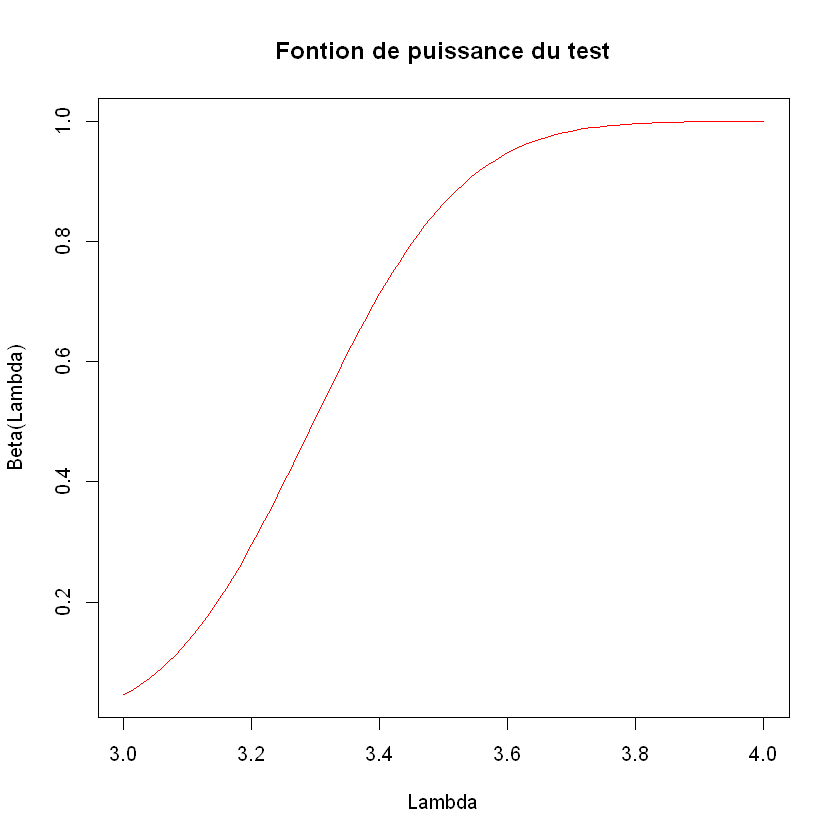

In [115]:
#Tracé de la fonction de puissance du test
lambda = seq(3,4,0.01)
n=100
s=s(100)
plot(lambda, 1 - ppois(s, n*lambda), main = "Fontion de puissance du test", xlab ="Lambda", ylab = "Beta(Lambda)",type='l', col="red")

Le nombre de données minimum $n_{0}$ pour que $\beta(\lambda=3.5)\ge0.9$ est $n_{0} = 101$.

[1] 101

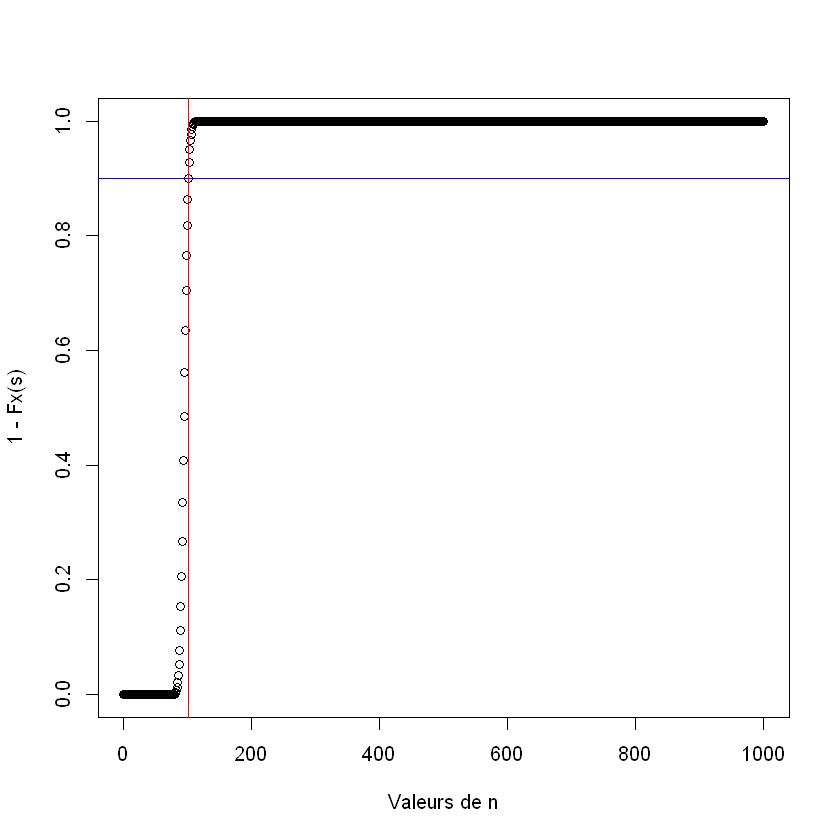

In [116]:
n = seq(0,1000,1)
#plot(n, ppois(3.5, n*3.5))
plot(n, 1 - ppois(s,n*3.5), xlab = "Valeurs de n", ylab = "1 - Fx(s)") 
abline(h=0.9,col="blue")

#Trouver le nombre de données au minimum pour respecter la condition
n0 = 0 
while ((1-ppois(s, n0*3.5))<0.9){
    n0 = n0 +1    
}
n0
abline(v=n0, col="red")

Pour remplir la condition $\beta(\lambda = 3.5) \ge 0.9$, on doit avoir un minimum de $n_{0}$ = 101 valeurs.


# EXERCICE 3 : Analyse Bayésienne

#### Question 1

D'après la page Wikipédia, un prior conjugué pour $\lambda$ dans le modèle de Poisson est $\lambda$ ~ $\Gamma(k, \theta)$, sachant que $\mathbb{E}(\lambda) = k\theta$, et que $Var(\lambda) = k\theta^{2}$.    
On trouve donc les paramètres du prior $(k,\theta) = (0.25, 20)$.

#### Question 2

On est dans le cas d'un modèle dominé, donc on peut déterminer la loi a posteriori en écrivant explicitement sa densité :    
$\pi(\lambda|x) = p_{\lambda}(x)\pi_{\lambda} = {{\prod_{i=1}^{n}}\frac{\exp^{-\lambda}\lambda^{x_{i}}}{x_{i}!}}(\theta^{k}\lambda^{k-1}\exp^{\frac{-\lambda}{\theta}}) \propto {{\prod_{i=1}^{n}} \exp^{-\lambda} \lambda^{x_{i}} (\lambda^{k-1}\exp^{-\frac{\lambda}{\theta}} )} \propto \exp^{-n\lambda} \lambda^{\sum_{i=1}^{n}x_{i}} (\lambda^{k-1}\exp^{-\frac{\lambda}{\theta}} ) \propto \exp^{-\lambda(n+\frac{1}{\theta})}\lambda^{({\sum_{i=1}^{n}x_{i})+k-1}} $

Donc les paramètres de la loi a posteriori sont : (${\sum_{i=1}^{n}x_{i}+k},\frac{\theta}{n\theta + 1})$.

Ces paramètres sont les mêmes que l'on retrouve sur la page wikipédia, le résultat est donc a priori cohérent.

L'estimateur de l'espérance a posteriori pour $\lambda$ est : 

$\hat\theta(x) = ({\sum_{i=1}^{n}x_{i}+k})\frac{\theta}{n\theta + 1}$.

#### Question 3 : Application numérique

In [117]:
#Calcul des paramètres de la loi a posteriori : 
k= 0.25
sum = 0
for (x in discoveries){
    sum = sum + x
}
k = sum + k
k 

theta = 20
n = 100
tmp = n*theta + 1
theta = theta/tmp
theta

[1] 310.25

[1] 0.009995002

#### Question 4

On commence par calculer les quantiles d'ordre $(1+\alpha)/2$ et $(1-\alpha)/2$ de la loi a posteriori.  

[1] 2.765458

[1] 3.45537

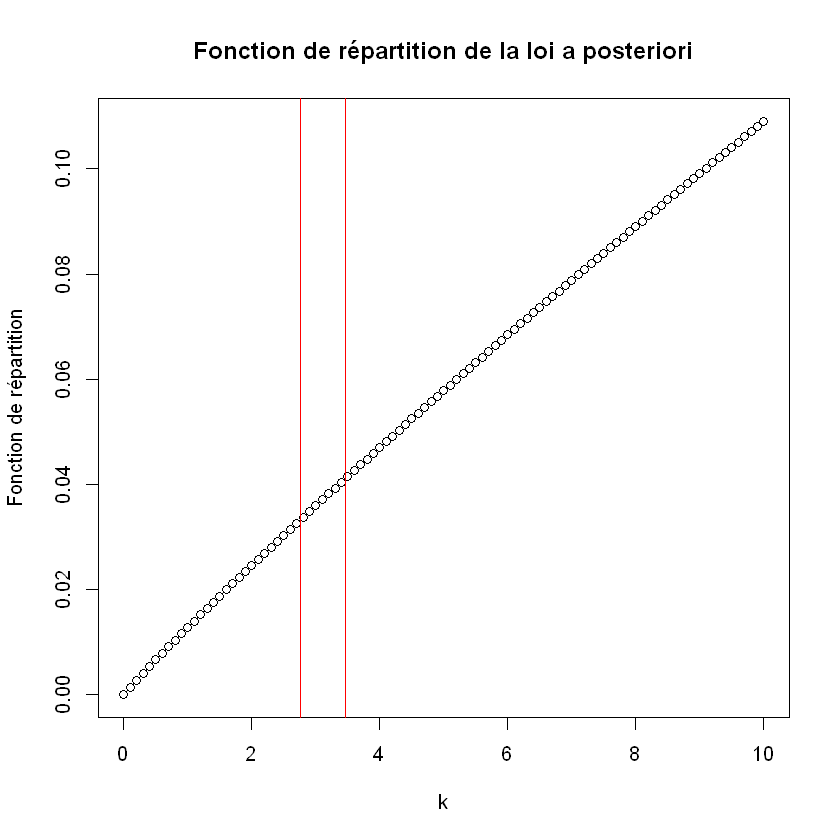

In [118]:
alpha = 0.95
q1_alpha = qgamma((1-alpha)/2, k, 1/theta)
q1_alpha

q2_alpha = qgamma((1+alpha)/2, k, 1/theta)
q2_alpha

abs = seq(0,10,0.1)
plot(abs, pgamma(abs, alpha, theta), main="Fonction de répartition de la loi a posteriori",xlab="k",ylab ="Fonction de répartition")
abline(v=q1_alpha,col="red")
abline(v=q2_alpha, col='red')



On en conclut donc que l'intervalle de crédibilité a posteriori de niveau $\alpha=0.95$ est : $I=[q_{\frac{1-\alpha}{2}},q_{\frac{1+\alpha}{2}}]$, où, $q_{\frac{1-\alpha}{2}} = 2.77$ et $q_{\frac{1+\alpha}{2}} = 3.45$.